# Dynamic Topic Modeling - Part 2

Goal: Conduct topic clustering using BERTopic and a 75K article dataset with just the first ~10 sentences. 

What is the dataset?: The dataset is split into five news sections: business, healthcare, technology, sports, and entertainment. The first 10 sentences have been extracted from the articles and preprocessed for stop word removal, removal of punctuation, etc. 

What is BERTopic?: BERTopic. BERTopic is a topic modeling technique that leverages BERT embeddings and c-TF-IDF to create dense clusters allowing for easily interpretable topics whilst keeping important words in the topic descriptions.

### Install new libraries

In [ ]:
! pip install bertopic

In [ ]:
! pip install bertopic[visualization]

### Load Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from bertopic import BERTopic
import nltk
import plotly.io as pio
from sentence_transformers import SentenceTransformer
#pio.renderers.default = "svg"
#import kaleido


### Load data

In [2]:
# Load in the all-the-news dataset (25k news articles) into a pandas dataframe
df = pd.read_csv('./data/75K-sentences.csv')

In [3]:
df.head()

,date,year,month,day,section,publication,word_count,char_count,sentence_count,clean_first_10_sentences
0,2019-06-23 00:00:00,2019,Jun,23,business,Reuters,890,4428,33,reuters the success hudson’s bay co executive...
1,2018-12-28 00:00:00,2018,Dec,28,business,Reuters,405,2007,13,new york reuters wells fargo co wfcn pay mi...
2,2019-05-21 00:00:00,2019,May,21,business,Reuters,954,4849,42,reuters major automakers announced slew inves...
3,2016-12-18 16:40:00,2016,Dec,18,sports,Vice,476,2206,21,just two years ago nebraska fired head coach b...
4,2018-11-24 00:00:00,2018,Nov,24,business,Reuters,568,2802,24,new york reuters the thanksgiving day black f...


In [4]:
df.shape

(75000, 10)

In [ ]:
# Drop business, movies, and sports sections
#df = df.drop(df[df.section.isin(['business', 'movies', 'sports'])].index)
#df.shape

In [ ]:
# Reset the index
#df = df.reset_index(drop=True)
#df.head()

In [5]:
# Inspect one of the cleaned titles
df['clean_first_10_sentences'][0]

'reuters  the success hudson’s bay co executive chairman richard baker’s  billion bid take department store operator private hinges whether independent valuator view company retailer less real estate owner corporate governance experts analysts said much hudson’s bay’s value locked real estate were company sell properties raise cash could fetch baker offered would forced pay rent run stores baker’s buyout consortium already owns  hudson’s bay made  per share offer remainder canadian company  premium stock trading announcement however minority shareholders including hedge fund land  buildings investment management llc say value company’s assets   per share hudson’s bay shares ended trading friday   offer price investors bet sweetened bid'

### Prepare data

In [6]:
text = df.clean_first_10_sentences.to_list()
dates = df.date.to_list()

### Create the model

In [7]:
# Create a BERTopic model
topic_model = BERTopic(verbose=True)
topics, probs = topic_model.fit_transform(text)

Batches: 100%|██████████| 2344/2344 [17:11<00:00,  2.27it/s]
2023-02-04 07:12:10,191 - BERTopic - Transformed documents to Embeddings
2023-02-04 07:12:35,099 - BERTopic - Reduced dimensionality


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2023-02-04 07:12:38,102 - BERTopic - Clustered reduced embeddings


#### Extract the largest 10 topics based on the number of topics assigned to each topic

In [8]:
freq = topic_model.get_topic_info()
freq.head(10)

,Topic,Count,Name
0,-1,25014,-1_people_the_said_film
1,0,2179,0_art_artist_artists_gallery
2,1,1590,1_nba_warriors_basketball_lebron
3,2,1309,2_wimbledon_tennis_slam_nadal
4,3,1007,3_baseball_cubs_yankees_inning
5,4,889,4_ufc_fight_mma_mcgregor
6,5,726,5_brady_patriots_quarterback_bowl
7,6,565,6_sp_stocks_dow_indexes
8,7,543,7_coronavirus_wuhan_outbreak_virus
9,8,492,8_vr_oculus_headset_virtual


Topic -1 is a topic consisting of outlier documents that are typically ignored due to their prevalence aross the whole corpus and not any particular topic.

In [9]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,25014,-1_people_the_said_film
1,0,2179,0_art_artist_artists_gallery
2,1,1590,1_nba_warriors_basketball_lebron
3,2,1309,2_wimbledon_tennis_slam_nadal
4,3,1007,3_baseball_cubs_yankees_inning
...,...,...,...
976,975,10,975_dumbbells_gym_deer_metzl
977,976,10,976_treasuries_destabilize_markets_weaponize
978,977,10,977_tab_tablet_pen_galaxy
979,978,10,978_apples_apple_bremmer_iphone


In [10]:
# Look at the terms that contribute to a topic
topic_nr = freq.iloc[5]["Topic"] # select a frequent topic
topic_model.get_topic(topic_nr)

[('ufc', 0.02380164677127689),
 ('fight', 0.015184590764292724),
 ('mma', 0.01175702174573785),
 ('mcgregor', 0.011062348041240727),
 ('fighters', 0.008695597623596934),
 ('heavyweight', 0.008522093074852738),
 ('fighter', 0.008300218368150234),
 ('boxing', 0.008143242178105185),
 ('bout', 0.00747170817953489),
 ('conor', 0.007036009802101061)]

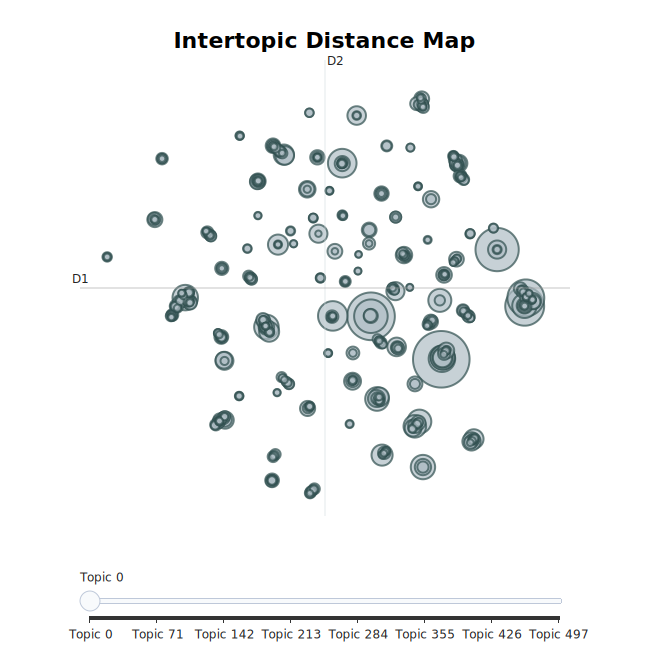

In [36]:
# Visualize the topics
topic_model.visualize_topics()

Each circle indicates a topic and its size is the frequency of the topic across all documents. It's interesting to play around with the slider. You can see where topics overlap. For example, Topic 6 contains VR, Oculus, Virtual, Headset and Vive. Topic 160, which is a red circle above Topic 6 when you move the slider to the right, contains spectacles, glasses, snapchat, lenses, and sunglasses.

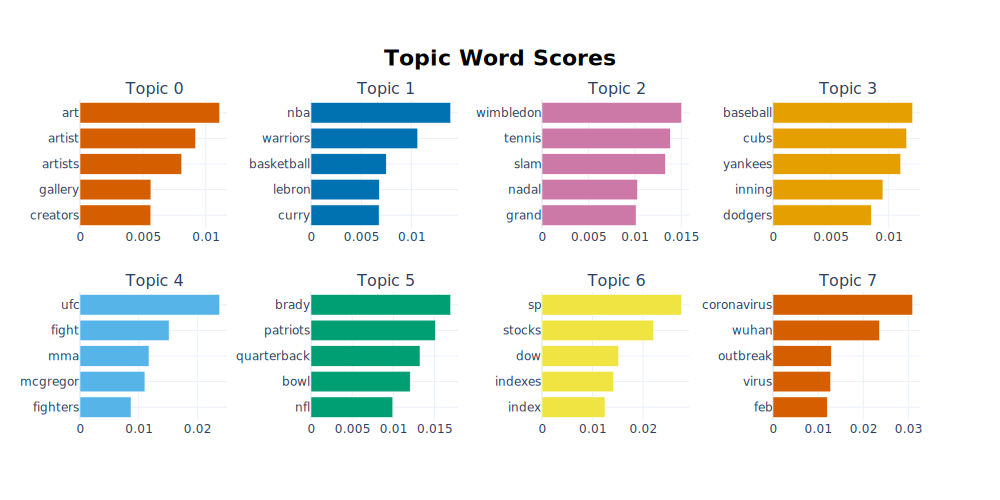

In [12]:
# Visualize the topics in a bar chart
topic_model.visualize_barchart()

In [ ]:
#hierarchical_topics = topic_model.hierarchical_topics(articles)
#topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

In [22]:
# Visualize the topics over time
#topics_over_time = topic_model.topics_over_time(articles, dates)

4938it [04:37, 17.81it/s]


In [ ]:
#topic_model.visualize_topics_over_time(topics_over_time, topics=[0, 1, 2, 3, 4, 5])

In [13]:
similar_topics, similarity = topic_model.find_topics("healthcare", top_n=5)
topic_model.get_topic(similar_topics[0])

[('medicaid', 0.021951754035731432),
 ('insurance', 0.01970729980752738),
 ('care', 0.016350392518076042),
 ('obamacare', 0.015444069319186167),
 ('healthcare', 0.013175941554987232),
 ('republicans', 0.01311656490187381),
 ('affordable', 0.012271036862389631),
 ('bill', 0.011052578579153193),
 ('repeal', 0.010460442464318273),
 ('preexisting', 0.010068010083199)]

### Create a new model with a fixed number of topics

In [14]:
topic_model_2 = BERTopic(verbose=True, calculate_probabilities=True, nr_topics=100)
topics_2, probs_2 = topic_model_2.fit_transform(text)

Batches: 100%|██████████| 2344/2344 [16:44<00:00,  2.33it/s]
2023-02-04 11:49:23,515 - BERTopic - Transformed documents to Embeddings
2023-02-04 11:49:41,432 - BERTopic - Reduced dimensionality


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2023-02-04 13:09:09,698 - BERTopic - Clustered reduced embeddings
2023-02-04 13:09:42,234 - BERTopic - Reduced number of topics from 1017 to 101


In [15]:
freq = topic_model_2.get_topic_info()
freq.head(10)

,Topic,Count,Name
0,-1,33276,-1_the_said_new_people
1,0,2226,0_art_artist_artists_work
2,1,1584,1_nba_warriors_game_points
3,2,1338,2_film_movie_series_trailer
4,3,1302,3_wimbledon_open_tennis_slam
5,4,1195,4_baseball_game_cubs_league
6,5,1001,5_inflation_fed_bank_central
7,6,880,6_ufc_fight_mma_mcgregor
8,7,821,7_sp_stocks_index_us
9,8,726,8_coronavirus_outbreak_virus_wuhan


### Visualize topics in a dendrogram

100%|██████████| 99/99 [00:00<00:00, 236.85it/s]


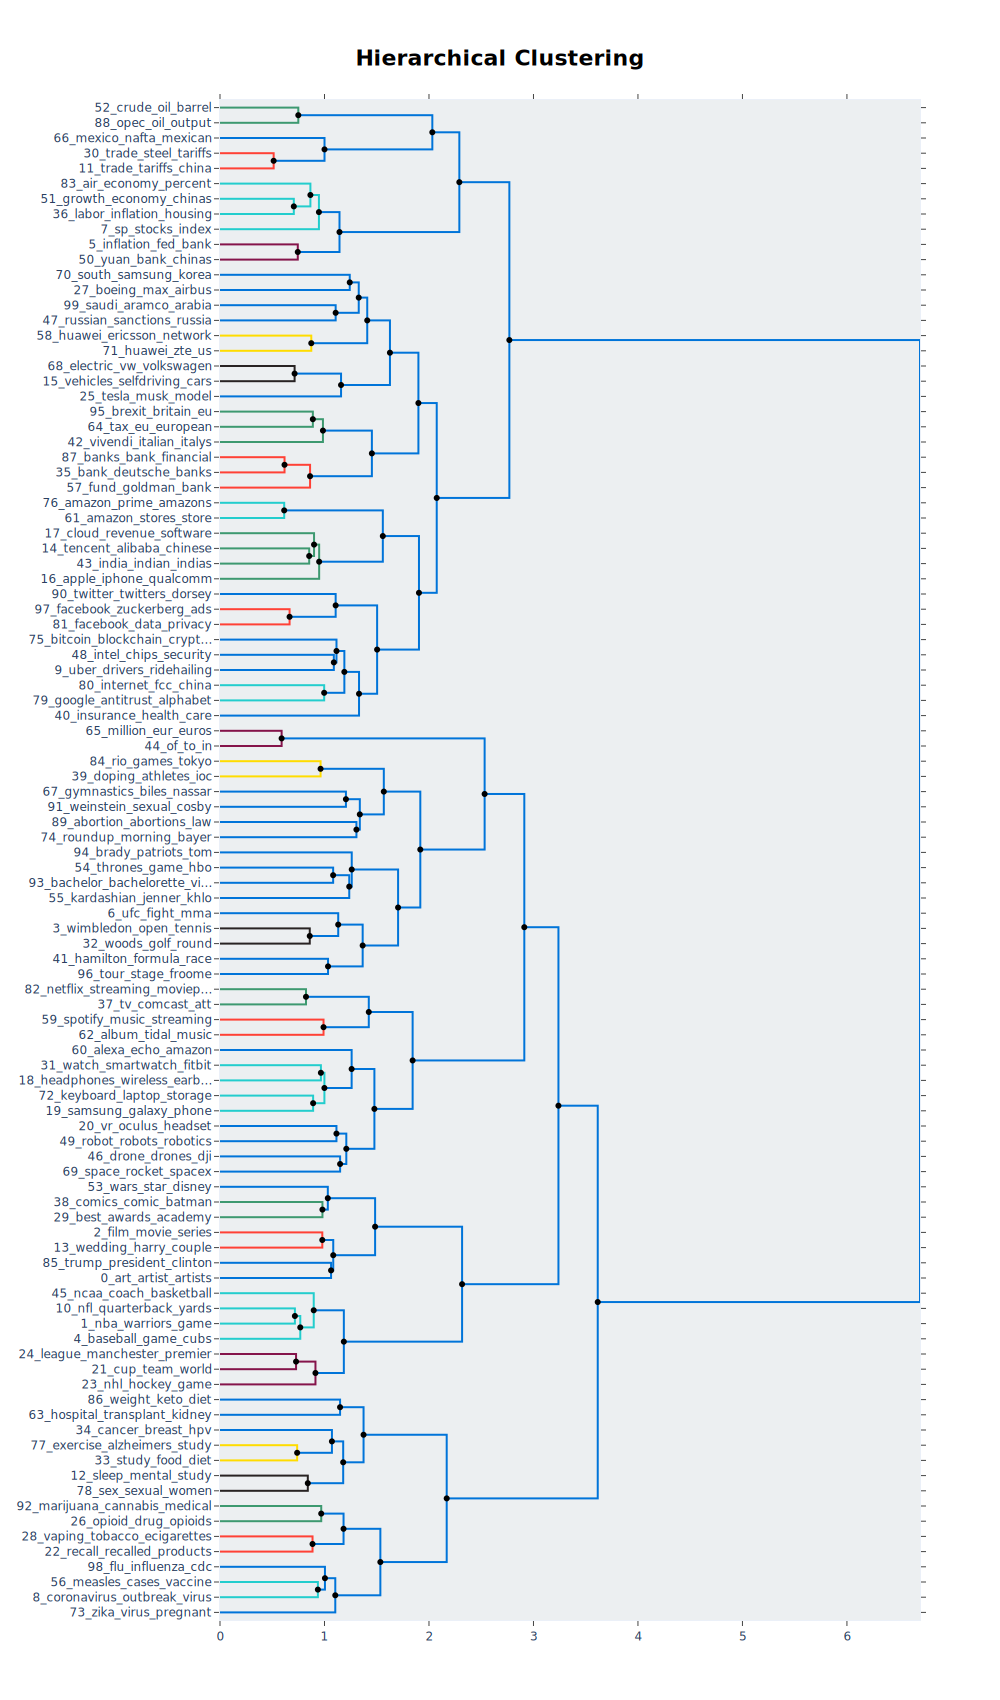

In [19]:
hierarchical_topics = topic_model_2.hierarchical_topics(text)
topic_model_2.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

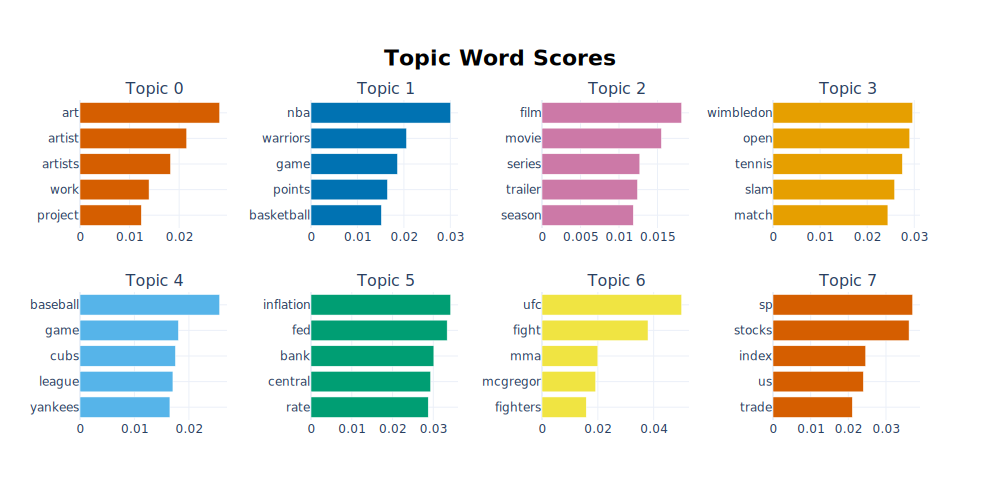

In [20]:
# Visualize the topics in a bar chart
topic_model_2.visualize_barchart()

### Topic Reduction After Training (topic_model)

In [21]:
topic_model.reduce_topics(text, nr_topics=500)

2023-02-04 13:44:49,705 - BERTopic - Reduced number of topics from 981 to 501


In [28]:
topics = topic_model.topics_


[('esports', 0.050298121775536456),
 ('games', 0.020969603117946836),
 ('sports', 0.018681891716565275),
 ('athletes', 0.018329062997253044),
 ('olympics', 0.018047204143251564),
 ('asian', 0.016407748637849946),
 ('olympic', 0.015443539449387218),
 ('newzoo', 0.014296693082978169),
 ('medals', 0.012883624578504777),
 ('oca', 0.012795076426520452)]

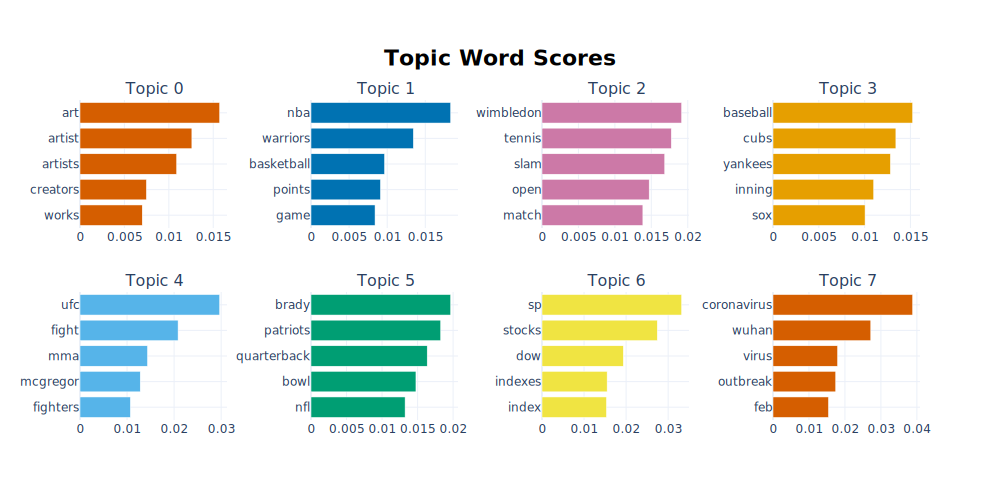

In [29]:
# Visualize the topics in a bar chart
topic_model.visualize_barchart()

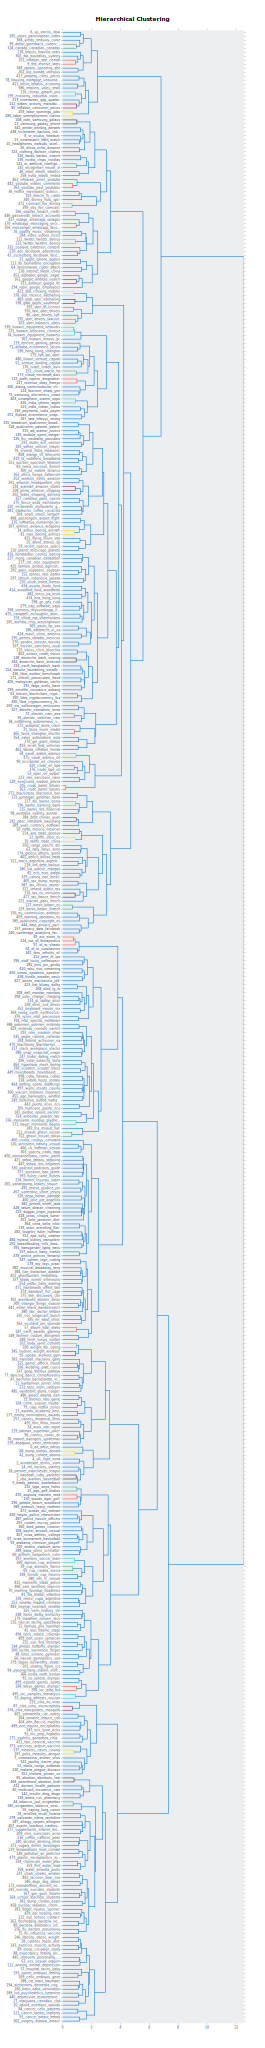

In [30]:
# Show in a dendrogram
topic_model.visualize_hierarchy()

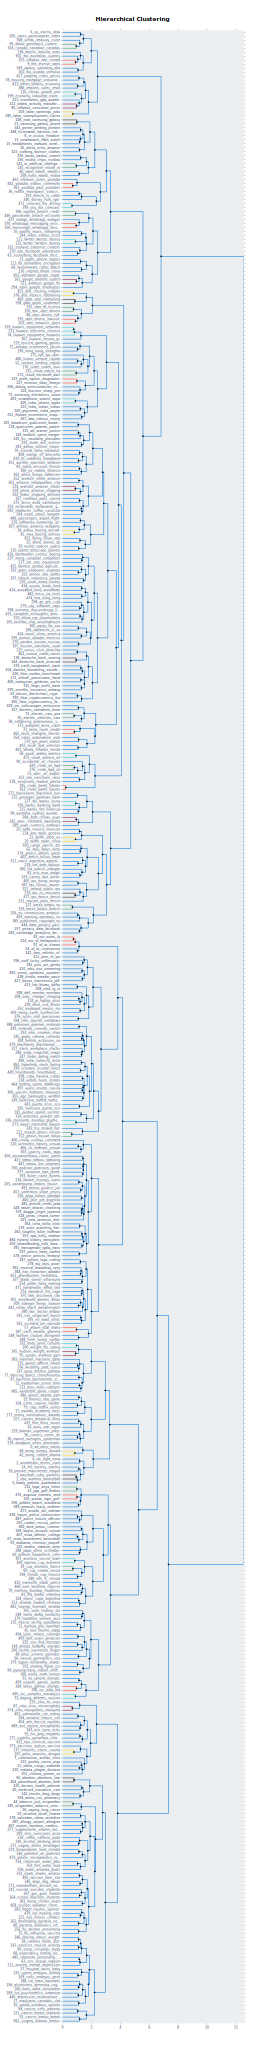

In [33]:
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

### Create a new model with a different embedding layer

In [40]:
from transformers.pipelines import pipeline

embedding_model = pipeline("feature-extraction", model="dslim/bert-base-NER")
topic_model_3 = BERTopic(embedding_model=embedding_model)

Downloading: 100%|██████████| 829/829 [00:00<00:00, 235kB/s]
Downloading: 100%|██████████| 433M/433M [00:05<00:00, 80.8MB/s] 
Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Downloading: 100%|██████████| 59.0/59.0 [00:00<00:00, 16.5kB/s]
Downloading: 100%|██████████| 213k/213k [00:00<00:00, 688kB/s] 
Downloading: 100%|██████████| 2.00/2.00 [00:00<00:00, 1.00kB/s]
Downloading: 100%|██████████| 112/112 [00:00<00:00, 32.9kB/s]


In [41]:
# Fit the model
topics_3, probs_3 = topic_model_3.fit_transform(text)

2023-02-04 19:32:33,236 - BERTopic - Transformed documents to Embeddings
2023-02-04 19:32:50,772 - BERTopic - Reduced dimensionality
2023-02-04 19:32:53,561 - BERTopic - Clustered reduced embeddings


In [42]:
# Save the model
topic_model_3.save("model_3")

/opt/homebrew/Caskroom/miniforge/base/envs/mle-week04/lib/python3.9/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



In [43]:
# Save topic model 2
topic_model_2.save("model_2")

/opt/homebrew/Caskroom/miniforge/base/envs/mle-week04/lib/python3.9/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

